In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SimpleRNN, Dropout, Bidirectional
from keras.preprocessing import sequence

In [5]:
# Завантаження даних
max_features = 5000  # обмежуємо кількість слів, які будемо використовувати
maxlen = 200  # обмежуємо кількість слів у кожному відгуку
batch_size = 64

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [6]:
# Заповнюємо або обрізаємо відгуки, щоб вони були однакової довжини
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 200)
x_test shape: (25000, 200)


In [17]:
# Створення моделі RNN
model_rnn = Sequential()
# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_rnn.add(Embedding(max_features, 128, input_length=maxlen))
# Додавання SimpleRNN шару з 64 вузлами
model_rnn.add(SimpleRNN(64))  # Використовуємо простий RNN шар
# Додавання Dense шару з одним вузлом та активацією sigmoid
model_rnn.add(Dense(1, activation='sigmoid'))

# Компіляція та навчання моделі RNN
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_rnn.summary())
history_rnn = model_rnn.fit(x_train, y_train, batch_size=batch_size, epochs=3, validation_data=(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          640000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 652417 (2.49 MB)
Trainable params: 652417 (2.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/3
391/391 [==============================] - 46s 114ms/step - loss: 0.5176 - accuracy: 0.7295 - val_loss: 0.3832 - val_accuracy: 0.8377
Epoch 2/3
391/391 [==============================] - 43s 110ms/step - loss: 0.3188 - accuracy: 0.8665 - val_loss: 0.4807 - val_accura

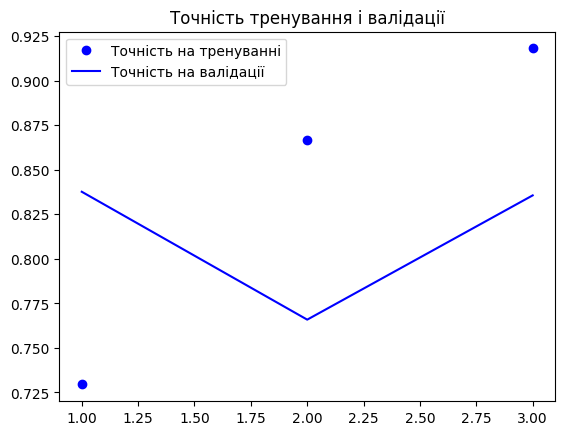

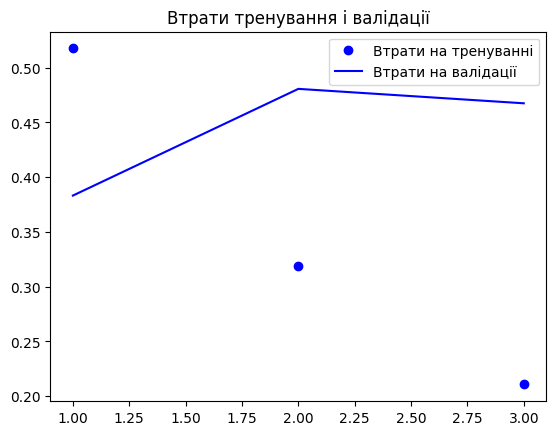

In [18]:
# Відображення результатів
acc = history_rnn.history['accuracy']
val_acc = history_rnn.history['val_accuracy']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [19]:
# Прогнозування на тестовому наборі даних
predictions_rnn = model_rnn.predict(x_test)

# Перетворення прогнозів в бінарний формат
binary_predictions_rnn = [1 if pred > 0.5 else 0 for pred in predictions_rnn]

# Виведення прогнозованих значень поряд з фактичними значеннями
print("Прогнозоване   |  Фактичне")
for i in range(10):
    print(f"{binary_predictions_rnn[i]}               |  {y_test[i]}")

# Оцінка моделі
test_loss_rnn, test_acc_rnn = model_rnn.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss_rnn))
print('Test Accuracy: {}'.format(test_acc_rnn))

782/782 [==============================] - 12s 16ms/step
Прогнозоване   |  Фактичне
0               |  0
1               |  1
1               |  1
1               |  0
1               |  1
1               |  1
1               |  1
0               |  0
1               |  0
1               |  1
782/782 [==============================] - 12s 16ms/step - loss: 0.4675 - accuracy: 0.8356
Test Loss: 0.46753108501434326
Test Accuracy: 0.835640013217926


In [20]:
# Створення моделі LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 128, input_length=maxlen))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1, activation='sigmoid'))

# Компіляція та навчання моделі LSTM
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_lstm.summary())
history_lstm = model_lstm.fit(x_train, y_train, batch_size=batch_size, epochs=3, validation_data=(x_test, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 128)          640000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 689473 (2.63 MB)
Trainable params: 689473 (2.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/3
391/391 [==============================] - 131s 331ms/step - loss: 0.4003 - accuracy: 0.8176 - val_loss: 0.3185 - val_accuracy: 0.8677
Epoch 2/3
391/391 [==============================] - 141s 360ms/step - loss: 0.2574 - accuracy: 0.8975 - val_loss: 0.3021 - val_accu

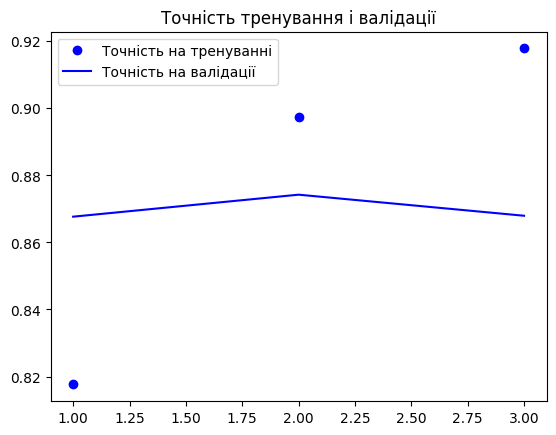

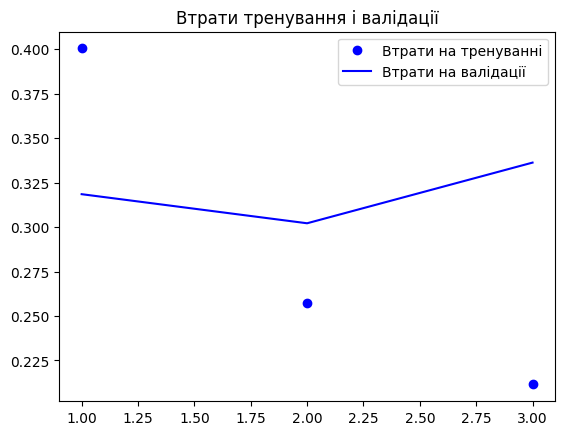

In [21]:
# Відображення результатів
acc_lstm = history_lstm.history['accuracy']
val_acc_lstm = history_lstm.history['val_accuracy']
loss_lstm = history_lstm.history['loss']
val_loss_lstm = history_lstm.history['val_loss']

epochs_lstm = range(1, len(acc_lstm) + 1)

plt.plot(epochs_lstm, acc_lstm, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs_lstm, val_acc_lstm, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs_lstm, loss_lstm, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs_lstm, val_loss_lstm, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [22]:
import matplotlib.pyplot as plt

# Прогнозування на тестовому наборі даних
predictions_lstm = model_lstm.predict(x_test)

# Перетворення прогнозів в бінарний формат
binary_predictions_lstm = [1 if pred > 0.5 else 0 for pred in predictions_lstm]

# Виведення прогнозованих значень поряд з фактичними значеннями
print("Прогнозоване   |  Фактичне")
for i in range(10):
    print(f"{binary_predictions_lstm[i]}               |  {y_test[i]}")

# Оцінка моделі
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss_lstm))
print('Test Accuracy: {}'.format(test_acc_lstm))

782/782 [==============================] - 30s 38ms/step
Прогнозоване   |  Фактичне
0               |  0
1               |  1
1               |  1
1               |  0
1               |  1
1               |  1
1               |  1
0               |  0
1               |  0
1               |  1
782/782 [==============================] - 30s 38ms/step - loss: 0.3362 - accuracy: 0.8680
Test Loss: 0.33621084690093994
Test Accuracy: 0.8679599761962891


In [23]:
# Створення двосторонньої LSTM моделі
model_bidirectional_lstm = Sequential()
model_bidirectional_lstm.add(Embedding(max_features, 128, input_length=maxlen))
model_bidirectional_lstm.add(Bidirectional(LSTM(64)))  # Використовуємо двосторонній LSTM шар
model_bidirectional_lstm.add(Dense(1, activation='sigmoid'))

# Компіляція та навчання двосторонньої LSTM моделі
model_bidirectional_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_bidirectional_lstm.summary())
history_bidirectional_lstm = model_bidirectional_lstm.fit(x_train, y_train, batch_size=batch_size, epochs=3, validation_data=(x_test, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 128)          640000    
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 738945 (2.82 MB)
Trainable params: 738945 (2.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/3
391/391 [==============================] - 324s 669ms/step - loss: 0.3968 - accuracy: 0.8096 - val_loss: 0.3373 - val_accuracy: 0.8604
Epoch 2/3
391/391 [==============================] - 261s 669ms/st

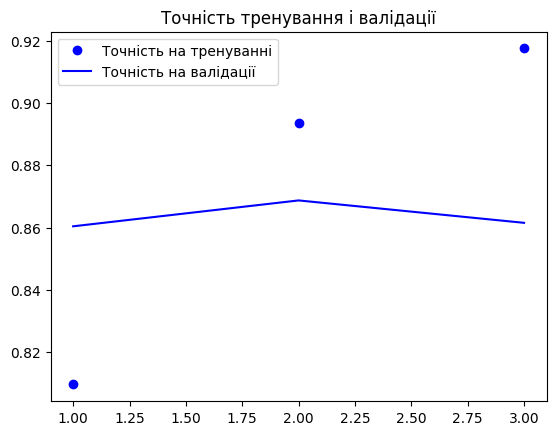

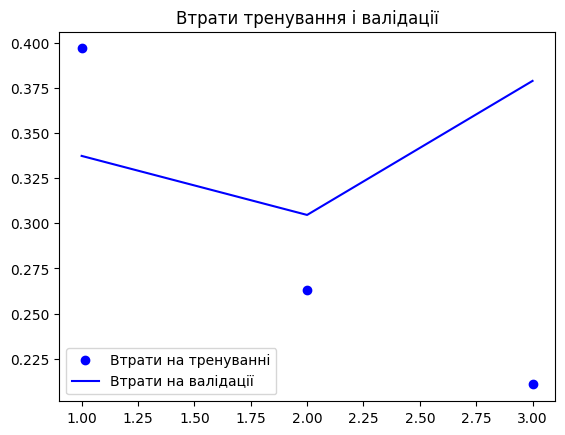

In [24]:
# Відображення результатів
acc_bidirectional_lstm = history_bidirectional_lstm.history['accuracy']
val_acc_bidirectional_lstm = history_bidirectional_lstm.history['val_accuracy']
loss_bidirectional_lstm = history_bidirectional_lstm.history['loss']
val_loss_bidirectional_lstm = history_bidirectional_lstm.history['val_loss']

epochs_bidirectional_lstm = range(1, len(acc_bidirectional_lstm) + 1)

plt.plot(epochs_bidirectional_lstm, acc_bidirectional_lstm, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs_bidirectional_lstm, val_acc_bidirectional_lstm, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs_bidirectional_lstm, loss_bidirectional_lstm, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs_bidirectional_lstm, val_loss_bidirectional_lstm, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [25]:
# Прогнозування на тестовому наборі даних
predictions_bidirectional_lstm = model_bidirectional_lstm.predict(x_test)

# Перетворення прогнозів в бінарний формат
binary_predictions_bidirectional_lstm = [1 if pred > 0.5 else 0 for pred in predictions_bidirectional_lstm]

# Виведення прогнозованих значень поряд з фактичними значеннями
print("Прогнозоване   |  Фактичне")
for i in range(10):
    print(f"{binary_predictions_bidirectional_lstm[i]}               |  {y_test[i]}")

# Оцінка моделі
test_loss_bidirectional_lstm, test_acc_bidirectional_lstm = model_bidirectional_lstm.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss_bidirectional_lstm))
print('Test Accuracy: {}'.format(test_acc_bidirectional_lstm))

782/782 [==============================] - 51s 64ms/step
Прогнозоване   |  Фактичне
0               |  0
1               |  1
1               |  1
0               |  0
1               |  1
1               |  1
1               |  1
0               |  0
1               |  0
1               |  1
782/782 [==============================] - 52s 66ms/step - loss: 0.3789 - accuracy: 0.8615
Test Loss: 0.3788696527481079
Test Accuracy: 0.861519992351532


In [30]:
# Створення глибокої моделі LSTM
model_deep_lstm = Sequential()
model_deep_lstm.add(Embedding(max_features, 128, input_length=maxlen))
model_deep_lstm.add(LSTM(64, return_sequences=True))
model_deep_lstm.add(Dropout(0.2))
model_deep_lstm.add(LSTM(64))
model_deep_lstm.add(Dense(1, activation='sigmoid'))

# Компіляція та навчання глибокої моделі LSTM
model_deep_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_deep_lstm.summary())
history_deep_lstm = model_deep_lstm.fit(x_train, y_train, batch_size=batch_size, epochs=3, validation_data=(x_test, y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 200, 128)          640000    
                                                                 
 lstm_7 (LSTM)               (None, 200, 64)           49408     
                                                                 
 dropout_2 (Dropout)         (None, 200, 64)           0         
                                                                 
 lstm_8 (LSTM)               (None, 64)                33024     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 722497 (2.76 MB)
Trainable params: 722497 (2.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/3
391

In [31]:
# Прогнозування на тестовому наборі даних
predictions_deep_lstm = model_deep_lstm.predict(x_test)

# Перетворення прогнозів в бінарний формат
binary_predictions_deep_lstm = [1 if pred > 0.5 else 0 for pred in predictions_deep_lstm]

# Виведення прогнозованих значень поряд з фактичними значеннями
print("Прогнозоване   |  Фактичне")
for i in range(10):
    print(f"{binary_predictions_deep_lstm[i]}               |  {y_test[i]}")

# Оцінка моделі
test_loss_deep_lstm, test_acc_deep_lstm = model_deep_lstm.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss_deep_lstm))
print('Test Accuracy: {}'.format(test_acc_deep_lstm))

782/782 [==============================] - 55s 69ms/step
Прогнозоване   |  Фактичне
0               |  0
1               |  1
1               |  1
0               |  0
1               |  1
1               |  1
1               |  1
0               |  0
1               |  0
1               |  1
782/782 [==============================] - 54s 69ms/step - loss: 0.3185 - accuracy: 0.8690
Test Loss: 0.31854677200317383
Test Accuracy: 0.8690400123596191


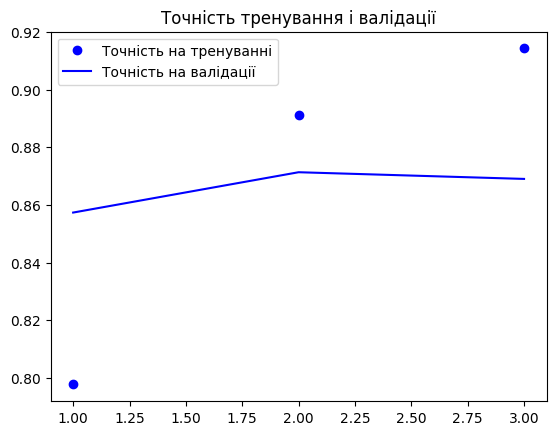

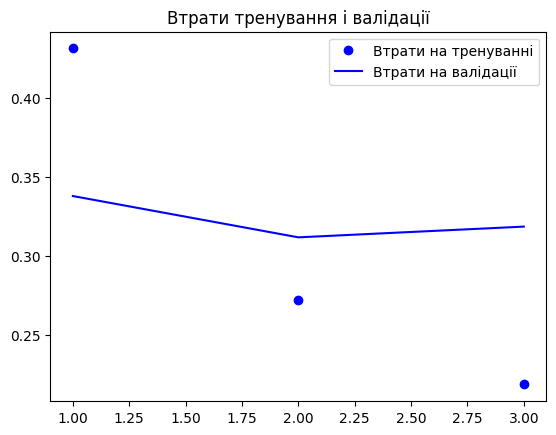

In [32]:
# Відображення результатів
acc_deep_lstm = history_deep_lstm.history['accuracy']
val_acc_deep_lstm = history_deep_lstm.history['val_accuracy']
loss_deep_lstm = history_deep_lstm.history['loss']
val_loss_deep_lstm = history_deep_lstm.history['val_loss']

epochs_deep_lstm = range(1, len(acc_deep_lstm) + 1)

plt.plot(epochs_deep_lstm, acc_deep_lstm, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs_deep_lstm, val_acc_deep_lstm, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs_deep_lstm, loss_deep_lstm, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs_deep_lstm, val_loss_deep_lstm, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [35]:
# Вивід результатів моделі на тестовому датасеті
def evaluate_model(model, model_name):
    scores = model.evaluate(x_test, y_test, verbose=0)
    print(f'{model_name} Model Accuracy: {scores[1]*100:.2f}%')

# Вивід результатів для кожної моделі
evaluate_model(model_rnn, 'RNN')
evaluate_model(model_lstm, 'LSTM')
evaluate_model(model_bidirectional_lstm, 'Bidirectional LSTM')
evaluate_model(model_deep_lstm, 'Deep LSTM')

RNN Model Accuracy: 83.56%
LSTM Model Accuracy: 86.80%
Bidirectional LSTM Model Accuracy: 86.15%
Deep LSTM Model Accuracy: 86.90%


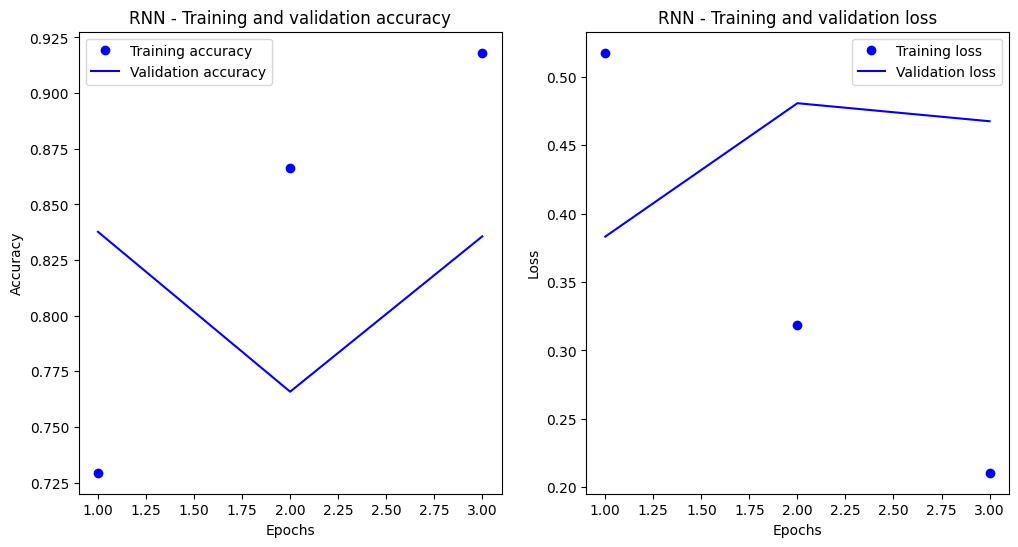

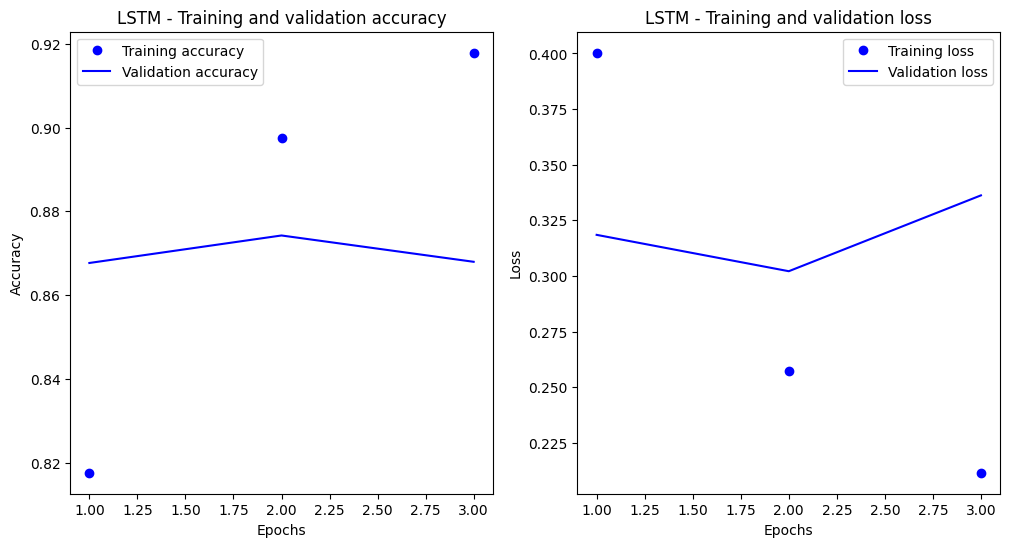

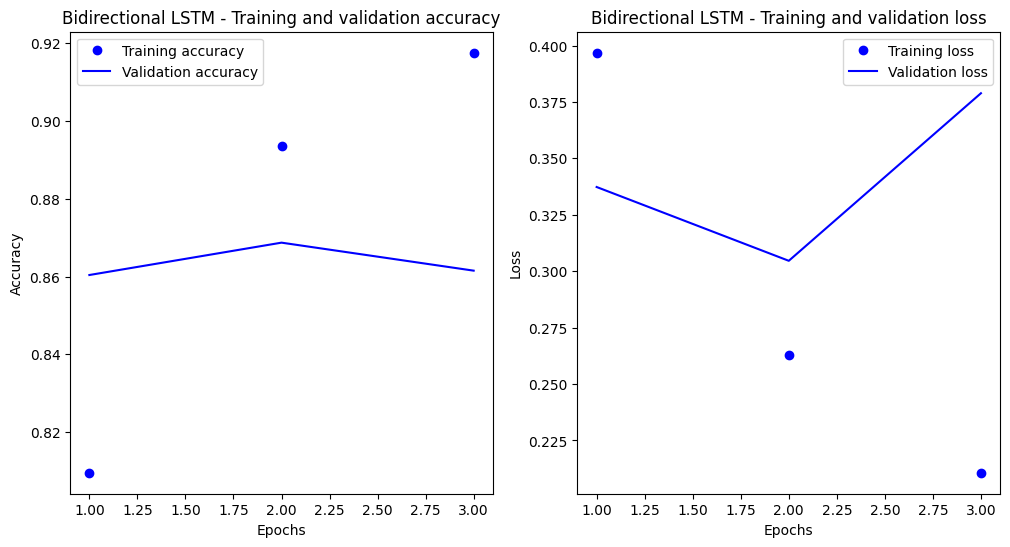

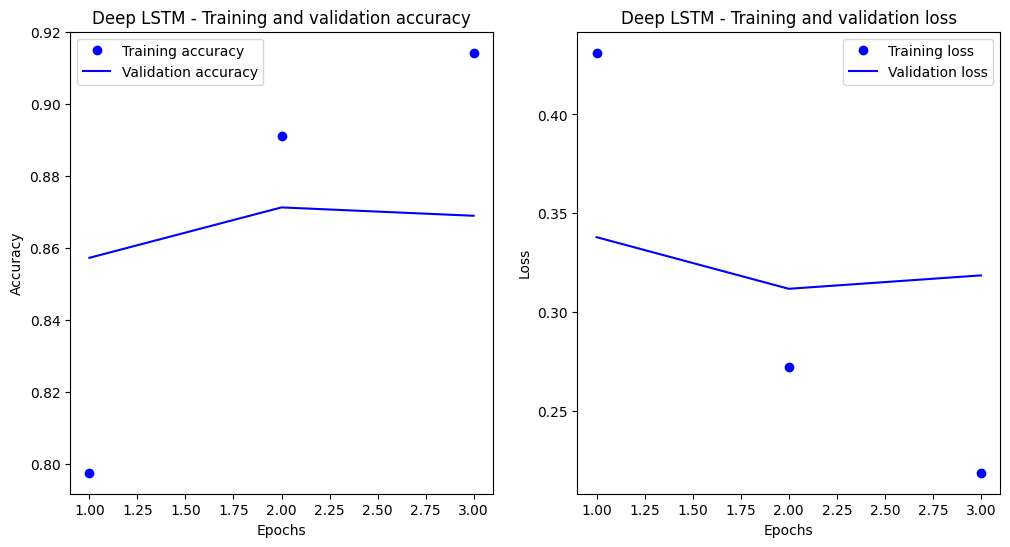

In [36]:
# Функція для побудови графіків точності та втрат
def plot_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(f'{model_name} - Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'{model_name} - Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Побудова графіків для кожної моделі
plot_history(history_rnn, 'RNN')
plot_history(history_lstm, 'LSTM')
plot_history(history_bidirectional_lstm, 'Bidirectional LSTM')
plot_history(history_deep_lstm, 'Deep LSTM')

### Висновки

1. RNN Model:
Точність: 83.56%
Ця модель має найнижчу точність серед усіх досліджених моделей.
Ймовірно, що причиною низької точності є обмежена здатність простої RNN моделі до врахування довгострокових залежностей у послідовностях даних.
2. LSTM Model:
Точність: 86.80%
Ця модель має дещо вищу точність порівняно з RNN.
Використання LSTM шарів дозволяє моделі краще управляти довгостроковими залежностями в послідовностях, що призводить до покращення точності.
3. Bidirectional LSTM Model:
Точність: 86.15%
Ця модель має трохи нижчу точність, ніж простий LSTM.
Використання двостороннього LSTM дозволяє моделі використовувати інформацію з обох напрямків послідовності, що зазвичай призводить до покращення результатів. Проте, у цьому випадку, це не принесло покращення у порівнянні з простим LSTM.
4. Deep LSTM Model:
Точність: 86.90%
Ця модель має найвищу точність серед усіх досліджених моделей.
Використання глибокої архітектури LSTM з декількома шарами LSTM дозволяє моделі вивчати складніші залежності в даних, що призводить до покращення точності.

Аналіз гіперпараметрів:

У всіх моделях використовувалась Embedding шар з розміром вектору 128.
Кількість нейронів у LSTM шарах була встановлена на рівні 64.
Для моделей LSTM та глибокої LSTM було використано dropout шар з коефіцієнтом 0.2, щоб уникнути перенавчання. Оптимізатор "adam" був використаний для компіляції всіх моделей.